### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

## Reading the data in

In [19]:
# The code was removed by Watson Studio for sharing.

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/03 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/03 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/03 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/03 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/03 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [22]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
#df.head()



### Data Exploration
Lets first have a descriptive exploration on our data.

In [24]:
# summarize the data
df_sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


Lets select some features to explore more.

In [56]:
df_sales.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [57]:
df_sales['ORDERDATE'] = df_sales['ORDERDATE'].astype('datetime64[ns]')

In [58]:
cdf = df_sales[['SALES','PRICEEACH','QUANTITYORDERED', 'MSRP', 'MONTH_ID', 'ORDERDATE']]
cdf.head(9)

,SALES,PRICEEACH,QUANTITYORDERED,MSRP,MONTH_ID,ORDERDATE
0,2871.00,95.70,30,95,2,2003-02-24
1,2765.90,81.35,34,95,5,2003-05-07
2,3884.34,94.74,41,95,7,2003-07-01
3,3746.70,83.26,45,95,8,2003-08-25
4,5205.27,100.00,49,95,10,2003-10-10
5,3479.76,96.66,36,95,10,2003-10-28
6,2497.77,86.13,29,95,11,2003-11-11
7,5512.32,100.00,48,95,11,2003-11-18
8,2168.54,98.57,22,95,12,2003-12-01


we can plot each of these fearues:

In [70]:
cdf2 = df_sales[['SALES','ORDERDATE']]
cdf2.dtypes

SALES               float64
ORDERDATE    datetime64[ns]
dtype: object

In [74]:
#cdf2 = cdf
cdf3 = cdf2.groupby('ORDERDATE').sum()
#cdf2.resample('M').mean()

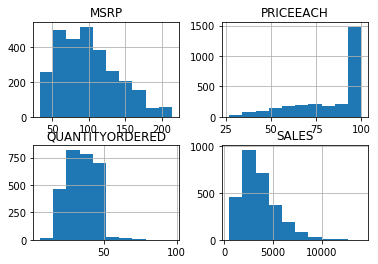

In [59]:
viz = cdf[['SALES','PRICEEACH','QUANTITYORDERED', 'MSRP']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

In [80]:
cdf3 = cdf3.reset_index()
cdf3.head()

,ORDERDATE,SALES
0,2003-01-06,12133.25
1,2003-01-09,11432.34
2,2003-01-10,6864.05
3,2003-01-29,54702.00
4,2003-01-31,44621.96


In [84]:
cdf3.dtypes

ORDERDATE    datetime64[ns]
SALES               float64
dtype: object

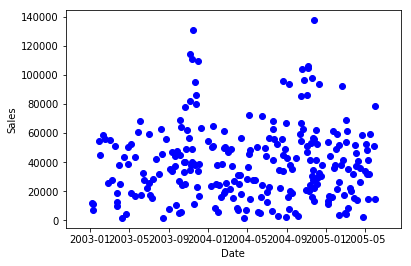

In [88]:


plt.scatter(cdf3.ORDERDATE, cdf3.SALES,  color='blue')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

#plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
#plt.xlabel("FUELCONSUMPTION_COMB")
#plt.ylabel("Emission")
#plt.show()

In [106]:
cdf4 = df_sales[['SALES','YEAR_ID']]
#cdf4['YEAR_ID'] = cdf4['YEAR_ID'].astype('datetime64[ns]')
#cdf4.dtypes
cdf4 = cdf4.groupby('YEAR_ID').sum()
cdf4 = cdf4.reset_index()
cdf4.head()


,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


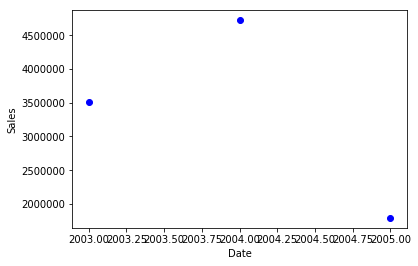

In [107]:
plt.scatter(cdf4.YEAR_ID, cdf4.SALES,  color='blue')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

#plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
#plt.xlabel("Engine size")
#plt.ylabel("Emission")
#plt.show()

In [108]:
cdf4 = df_sales[['SALES','ORDERDATE']]
#cdf4['YEAR_ID'] = cdf4['YEAR_ID'].astype('datetime64[ns]')
#cdf4.dtypes
cdf4 = cdf4.groupby('ORDERDATE').sum()
cdf4 = cdf4.reset_index()
cdf4.head()

,ORDERDATE,SALES
0,2003-01-06,12133.25
1,2003-01-09,11432.34
2,2003-01-10,6864.05
3,2003-01-29,54702.00
4,2003-01-31,44621.96


In [112]:
cdf4.dtypes

ORDERDATE    datetime64[ns]
SALES               float64
dtype: object

In [115]:
df_sales[['SALES','ORDERDATE']]
df_sales.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [133]:
cdf5 = df_sales[['SALES','ORDERDATE']]
#cdf4['YEAR_ID'] = cdf4['YEAR_ID'].astype('datetime64[ns]')
#cdf4.dtypes
cdf5 = cdf5.groupby('ORDERDATE').sum()
cdf5 = cdf5.reset_index()
cdf5['ORDERDATEYEARMONTH'] = pd.to_datetime(cdf5['ORDERDATE']).dt.to_period('M')
cdf5 = cdf5.groupby('ORDERDATEYEARMONTH').sum()
cdf5 = cdf5.reset_index()
cdf5 = cdf5.reset_index()
cdf5.head()

,index,ORDERDATEYEARMONTH,SALES
0,0,2003-01,129753.60
1,1,2003-02,140836.19
2,2,2003-03,174504.90
3,3,2003-04,201609.55
4,4,2003-05,192673.11


In [131]:
#cdf5['ORDERDATEYEARMONTH'] = cdf5['ORDERDATEYEARMONTH'].astype('datetime64[ns]')
cdf5.dtypes

index                     int64
ORDERDATEYEARMONTH    period[M]
SALES                   float64
dtype: object

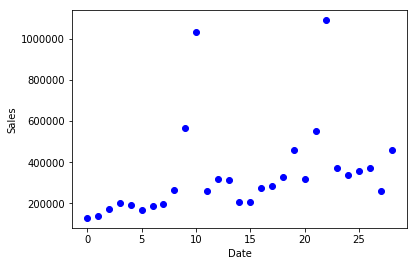

In [132]:
plt.scatter(cdf5.index, cdf5.SALES,  color='blue')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [152]:
cdf5.head()

,index,ORDERDATEYEARMONTH,SALES
0,0,2003-01,129753.60
1,1,2003-02,140836.19
2,2,2003-03,174504.90
3,3,2003-04,201609.55
4,4,2003-05,192673.11


In [140]:
cdf5
msk = np.random.rand(len(cdf5)) < 0.8
train = cdf5[msk]
test = cdf5[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

In [155]:
train.head()

,index,ORDERDATEYEARMONTH,SALES
0,0,2003-01,129753.60
3,3,2003-04,201609.55
4,4,2003-05,192673.11
5,5,2003-06,168082.56
6,6,2003-07,187731.88


#### Train data distribution

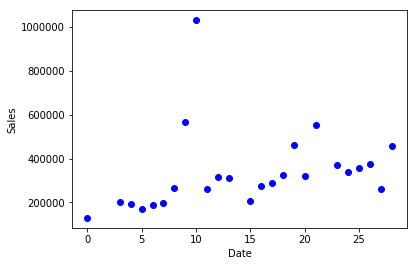

In [148]:
plt.scatter(train.index, train.SALES,  color='blue')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

#### Modeling
Using sklearn package to model data.

In [147]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['index']])
train_y = np.asanyarray(train[['SALES']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[5881.93848475]]
Intercept:  [250553.38384394]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

Text(0, 0.5, 'Sales')

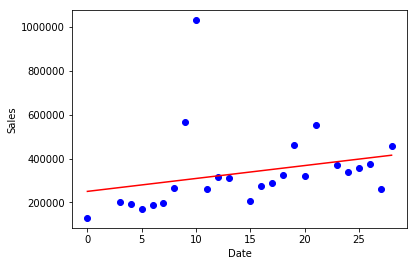

In [150]:
plt.scatter(train.index, train.SALES,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date")
plt.ylabel("Sales")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [154]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['index']])
test_y = np.asanyarray(test[['SALES']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 259917.57
Residual sum of squares (MSE): 135014249658.52
R2-score: -50.22
